In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Load dataset

In [10]:
path_data = 'dataset/data.csv'
path_label = 'dataset/label.csv'

In [11]:
x = pd.read_csv(path_data, header=None)
y = pd.read_csv(path_label, header=None)
x.shape, y.shape

((810000, 27), (810000, 1))

#### Splitting data

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((648000, 27), (162000, 27), (648000, 1), (162000, 1))

In [13]:
y_train = np.array(y_train).reshape((y_train.shape[0]))
y_test = np.array(y_test).reshape((y_test.shape[0]))
y_train.shape

(648000,)

### MLPClassifier

In [16]:
model = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='tanh', max_iter=200, learning_rate='adaptive', learning_rate_init=1e-3, tol=1e-4, verbose=True)
model.fit(x_train, y_train)

Iteration 1, loss = 0.14692796
Iteration 2, loss = 0.13280306
Iteration 3, loss = 0.12876140
Iteration 4, loss = 0.12534274
Iteration 5, loss = 0.12251280
Iteration 6, loss = 0.12054826
Iteration 7, loss = 0.11920829
Iteration 8, loss = 0.11805768
Iteration 9, loss = 0.11694509
Iteration 10, loss = 0.11620513
Iteration 11, loss = 0.11540965
Iteration 12, loss = 0.11483966
Iteration 13, loss = 0.11411927
Iteration 14, loss = 0.11362386
Iteration 15, loss = 0.11317130
Iteration 16, loss = 0.11283192
Iteration 17, loss = 0.11245363
Iteration 18, loss = 0.11218241
Iteration 19, loss = 0.11192940
Iteration 20, loss = 0.11175955
Iteration 21, loss = 0.11125477
Iteration 22, loss = 0.11117873
Iteration 23, loss = 0.11108068
Iteration 24, loss = 0.11091706
Iteration 25, loss = 0.11080986
Iteration 26, loss = 0.11041699
Iteration 27, loss = 0.11026382
Iteration 28, loss = 0.11031012
Iteration 29, loss = 0.11020960
Iteration 30, loss = 0.11016512
Iteration 31, loss = 0.11005677
Iteration 32, los

MLPClassifier(activation='tanh', hidden_layer_sizes=(128, 64, 32),
              learning_rate='adaptive', verbose=True)

### Random Forest

In [27]:
dt = RandomForestClassifier(n_estimators=200, max_depth=10, n_jobs=-1, 
                            min_samples_leaf=5, class_weight='balanced')

dt.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, n_estimators=200, n_jobs=-1)

In [18]:
feature_important = dt.feature_importances_ 
feature_important

array([0.29551425, 0.00915901, 0.00673824, 0.006961  , 0.00800076,
       0.00999246, 0.00655862, 0.00635978, 0.00787311, 0.0086832 ,
       0.01185599, 0.00701192, 0.00847266, 0.02536513, 0.02402067,
       0.00778278, 0.00911374, 0.02491446, 0.34875704, 0.02908316,
       0.01028215, 0.01261797, 0.02385521, 0.03041326, 0.02487999,
       0.01991962, 0.01581384])

### Predict

#### MLPClassifier Predict

In [19]:
y_pred_mlp = model.predict(x_test)

#### Random Forest Predict

In [28]:
y_pred_dt = dt.predict(x_test)

### Metrics

#### MLPClassifier metrics

In [21]:
acc = accuracy_score(y_test, y_pred_mlp)
precision = precision_score(y_test, y_pred_mlp)
recall = recall_score(y_test, y_pred_mlp)
f1 = f1_score(y_test, y_pred_mlp)

print(f'Accuracy: {acc:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1: {f1:.2f}\n')

Accuracy: 0.96
Precision: 0.91
Recall: 0.73
F1: 0.81



### Random Forest metrics

In [29]:
acc_ = accuracy_score(y_test, y_pred_dt)
precision_ = precision_score(y_test, y_pred_dt)
recall_ = recall_score(y_test, y_pred_dt)
f1_ = f1_score(y_test, y_pred_dt)

print(f'Accuracy: {acc_:.2f}')
print(f'Precision: {precision_:.2f}')
print(f'Recall: {recall_:.2f}')
print(f'F1: {f1_:.2f}\n')

Accuracy: 0.93
Precision: 0.67
Recall: 0.81
F1: 0.73



### Loss

#### MLPClassifier loss

best loss: 0.10625578054744347


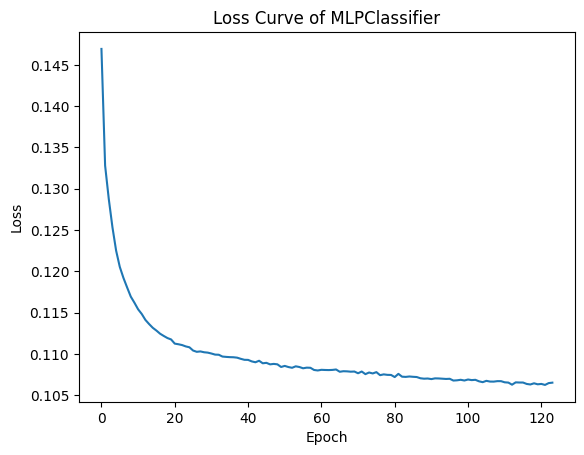

In [23]:
print(f'best loss: {model.best_loss_}')
plt.plot(model.loss_curve_)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve of MLPClassifier")
plt.show()

#### Random Forest loss

In [31]:
y_proba = dt.predict_proba(x_test)

# Tính log loss
loss = log_loss(y_test, y_proba)
print(f"Log Loss: {loss:.4f}")

Log Loss: 0.2275


### Dump model

In [25]:
import joblib

joblib.dump(model, 'D:/Dev/Project/THE_FINAL_MINESWEEPER/models/mlp_model.pkl')

['D:/Dev/Project/THE_FINAL_MINESWEEPER/models/mlp_model.pkl']

In [32]:
joblib.dump(dt, 'D:/Dev/Project/THE_FINAL_MINESWEEPER/models/dt_model.pkl')

['D:/Dev/Project/THE_FINAL_MINESWEEPER/models/dt_model.pkl']